№1

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn import model_selection
import numpy as np

from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, coef_list, eta):

    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [5]:
def mean_squared_error(y_real, prediction):
    return (sum((y_real - prediction)**2)) / len(y_real)

In [6]:
def residual(y, z):
    return - (z - y)

In [7]:
# Функция обучения градиентного бустинга.
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, residual(y_train, target))
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

In [8]:
# Число деревьев в ансамбле
n_trees = 10

# для простоты примем коэффициенты равными 1
coefs = [1] * n_trees

# Максимальная глубина деревьев
max_depth = 3

# Шаг
eta = 0.1

trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [9]:
def evaluate(X_train, X_test, y_train, y_test, trees, coefs, eta):
    
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    test_prediction = gb_predict(X_test, trees, coefs, eta)

    return mean_squared_error(y_train, train_prediction), mean_squared_error(y_test, test_prediction)

In [10]:
eta = 0.1
max_depth = 5
n_trees = 15

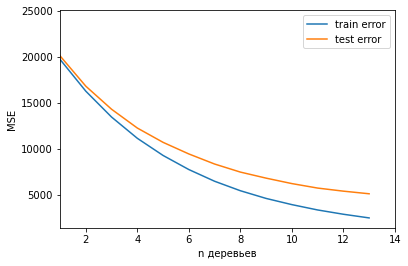

In [11]:
result_train, result_test = [], []
n_trees_array = np.arange(1, 15)
for i in n_trees_array:
    coefs = [1] * n_trees
    trees, train_errors, test_errors = gb_fit(i, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    mse_train, mse_test = evaluate(X_train, X_test, y_train, y_test, trees, coefs, eta)
    result_train.append(mse_train)
    result_test.append(mse_test)

plt.xlim(1, len(n_trees_array))
plt.plot(result_train, label='train error')
plt.plot(result_test, label='test error')
plt.xlabel('n деревьев')
plt.ylabel('MSE')
plt.legend(loc='upper right')

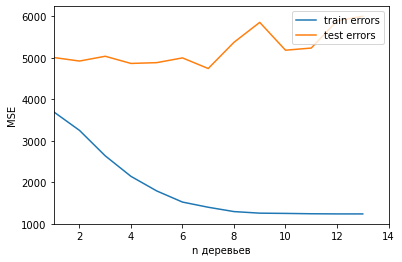

In [12]:
coefs = [1] * n_trees

result_train, result_test = [], []
depth_array = np.arange(1, 15)
for i in depth_array:
 
    trees, train_errors, test_errors = gb_fit(n_trees, i, X_train, X_test, y_train, y_test, coefs, eta)
    mse_train, mse_test = evaluate(X_train, X_test, y_train, y_test, trees, coefs, eta)
    result_train.append(mse_train)
    result_test.append(mse_test)

plt.xlim(1, len(depth_array))
plt.plot(result_train, label='train errors')
plt.plot(result_test, label='test errors')
plt.xlabel('n деревьев')
plt.ylabel('MSE')
plt.legend(loc='upper right')

При увеличении n деревьев в ансамбле ошибка уменьшается, как на тесте, так и на трейне.

При увеличении глубины деревьев в ансамбле ошибки уменьшадись, однако с опредеделенного момента train продолжает уменьшаться, а test увеличивается. (скорее всего связано это с переобучением)